In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv("Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [25]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [26]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [27]:
df.size

1113

In [28]:
df.shape

(159, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [30]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [31]:
#1
Species_counts=df['Species'].value_counts()

<BarContainer object of 7 artists>

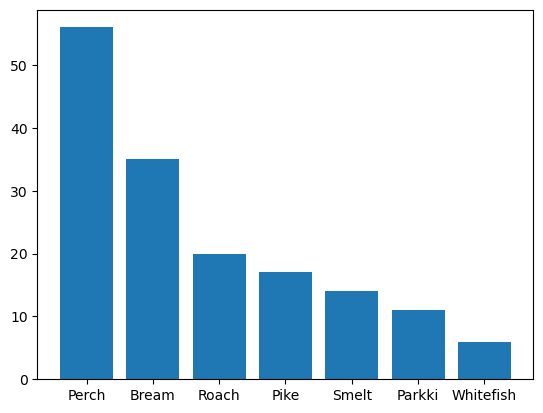

In [32]:
plt.bar(Species_counts.index,Species_counts.values)

In [22]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [33]:
import warnings
warnings.filterwarnings("ignore")

<Axes: >

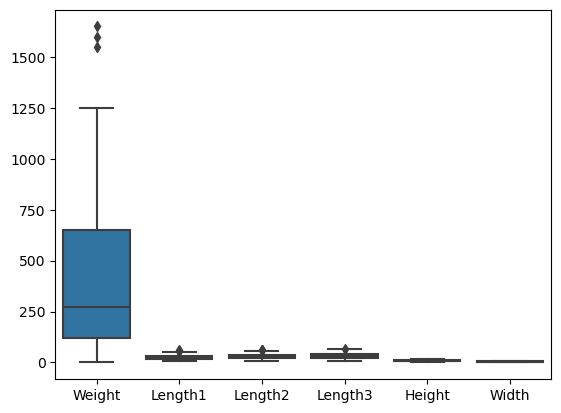

In [34]:
sns.boxplot(df)


In [35]:
for cols in df.columns[::]:
    if df[cols].dtype == object:
        continue
    else:
        Q1=df[cols].quantile(q=0.25)
        Q3=df[cols].quantile(q=0.75)
        iqr=Q3-Q1
        
        low=Q1-1.5*(Q3-Q1)
        high=Q3+1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

<Axes: xlabel='Weight'>

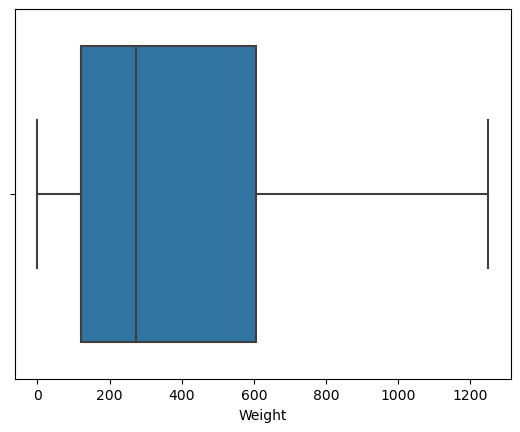

In [36]:
sns.boxplot(x=df['Weight'],orient='h')

In [11]:
df=pd.get_dummies(df,drop_first=True)
df.shape

(159, 12)

In [39]:
x= df.drop("Species",axis=1)
x_train.shape

(127, 5)

In [45]:
x= df[['Length1','Length2','Length3','Height','Width']].values
y= df['Weight'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_train_pred= model.predict(x_train)
y_test_pred= model.predict(x_test)
from sklearn.metrics import r2_score
train=r2_score(y_train,y_train_pred)
test=r2_score(y_test,y_test_pred)
print('R^2_train= ',train,'\nR^2_test= ',test)

R^2_train=  0.8939986038097781 
R^2_test=  0.8870944096535752


# simple

In [52]:
x=df['Width'].iloc[:,:1]
y=df['Weight']
#print(x.shape)
#print(y.shape)

IndexingError: Too many indexers

In [ ]:
# Lasso

In [46]:
from sklearn.linear_model import Lasso
lasso_reg =Lasso()
lasso_reg.fit(x_train,y_train)

Lasso()

In [48]:
Reg_predict_lasso_test=model.predict(x_test)
Reg_predict_lasso_train=model.predict(x_train)

In [50]:
lasso_reg.score(x_test,y_test)

0.8862259407226077

In [51]:
lasso_reg.score(x_train,y_train)

0.8924105385656045

# ridge

In [54]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(x_train,y_train)

Ridge()

In [55]:
ridge_reg.score(x_test,y_test)

0.8872923413739906

In [56]:
ridge_reg.score(x_train,y_train)

0.8938112977539633

# ElasticNet

In [58]:
from sklearn.linear_model import ElasticNet
En_reg=ElasticNet()
En_reg.fit(x_train,y_train)

ElasticNet()

In [59]:
En_reg.score(x_test,y_test)

0.8901254705308173

In [60]:
En_reg.score(x_train,y_train)

0.8851271213443557